In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14995, done.
remote: Total 14995 (delta 0), reused 0 (delta 0), pack-reused 14995
Receiving objects: 100% (14995/14995), 14.02 MiB | 15.25 MiB/s, done.
Resolving deltas: 100% (10286/10286), done.


In [ ]:
!pip install -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.6 MB/s eta 0:00:00


mengimpor modul yang diperlukan untuk menyimpulkan pengaturan kode.

In [ ]:
%pip install wandb
import wandb
wandb.login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 61.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 16.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=31d5aa89d04ee0d4d10de3f039e4c57b222ad34cc51f813d91affe60052ddd9d
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [ ]:
%cd /content

/content


In [ ]:
!mkdir ship_dataset
%cd ship_dataset

/content/ship_dataset


**Download dataset.**

Unrar dataset

In [ ]:
import shutil

In [ ]:
shutil.rmtree('/content/yolov5/runs')

In [ ]:
!dir

In [ ]:
!unrar e '/content/drive/MyDrive/Colab Notebooks/annotations.rar' '/content/ship_dataset/annotations' 


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/annotations.rar

Extracting  /content/ship_dataset/annotations/image0.xml                   0%  OK 
Extracting  /content/ship_dataset/annotations/image1.xml                   0%  OK 
Extracting  /content/ship_dataset/annotations/image10.xml                  0%  OK 
Extracting  /content/ship_dataset/annotations/image100.xml                 0%  OK 
Extracting  /content/ship_dataset/annotations/image1000.xml                0%  OK 
Extracting  /content/ship_dataset/annotations/image1001.xml                0%  OK 
Extracting  /content/ship_dataset/annotations/image1002.xml                0%  OK 
Extracting  /content/ship_dataset/annotations/image1003.xml                0%  OK 
Extracting  /content/ship_dataset/annotations/image1004.xml                0%  OK 
Extracting  /content/shi

In [ ]:
!unrar e '/content/drive/MyDrive/Colab Notebooks/images.rar' '/content/ship_dataset/images' 


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/Colab Notebooks/images.rar

Extracting  /content/ship_dataset/images/image0.jpg                        0%  OK 
Extracting  /content/ship_dataset/images/image1.jpg                        0%  OK 
Extracting  /content/ship_dataset/images/image10.jpg                       0%  OK 
Extracting  /content/ship_dataset/images/image100.jpg                      0%  OK 
Extracting  /content/ship_dataset/images/image1000.jpg                     0%  OK 
Extracting  /content/ship_dataset/images/image1001.jpg                     0%  OK 
Extracting  /content/ship_dataset/images/image1002.jpg                     0%  OK 
Extracting  /content/ship_dataset/images/image1003.jpg                     0%  OK 
Extracting  /content/ship_dataset/images/image1004.jpg                     0%  OK 
Extracting  /content/ship_dat

In [ ]:
%cd /content/ship_dataset/annotations

/content/ship_dataset/annotations


In [ ]:
# Assuming you're in the data folder
!cat image1.xml

<annotation>
	<folder>input</folder>
	<filename>image0.jpg</filename>
	<path>D:\labelImg\input\image0.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>800</width>
		<height>650</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>perahunelayan</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>539</xmin>
			<ymin>398</ymin>
			<xmax>662</xmax>
			<ymax>417</ymax>
		</bndbox>
	</object>
	<object>
		<name>perahunelayan</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>327</xmin>
			<ymin>387</ymin>
			<xmax>408</xmax>
			<ymax>400</ymax>
		</bndbox>
	</object>
	<object>
		<name>perahunelayan</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>164</xmin>
			<ymin>388</ymin>
			<xmax>225</xmax>
			<ymax>398</ymax>
		</bndbox>
	</object>
</annotation>


In [ ]:
%cd /content/ship_dataset

/content/ship_dataset


**Ubah Anotasi menjadi Format YOLO v5**



In [ ]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [ ]:
print(extract_info_from_xml('/content/ship_dataset/annotations/image1.xml'))

{'bboxes': [{'class': 'perahunelayan', 'xmin': 539, 'ymin': 398, 'xmax': 662, 'ymax': 417}, {'class': 'perahunelayan', 'xmin': 327, 'ymin': 387, 'xmax': 408, 'ymax': 400}, {'class': 'perahunelayan', 'xmin': 164, 'ymin': 388, 'xmax': 225, 'ymax': 398}], 'filename': 'image0.jpg', 'image_size': (800, 650, 3)}


In [ ]:
%cd /content/ship_dataset

/content/ship_dataset


In [ ]:
!dir

annotations  images


Sekarang kita mengubah semua anotasi xml menjadi txt gaya YOLO.

In [ ]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"perahunelayan": 0,
                           "kapalnelayan": 1}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("annotations", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [ ]:
# Get the annotations
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

100%|██████████| 4843/4843 [00:01<00:00, 4676.94it/s]


**Testing the annotations**

Hanya untuk pemeriksaan, sekarang mari kita uji beberapa anotasi yang diubah ini. Kami secara acak memuat salah satu anotasi dan plot boxes menggunakan anotasi yang diubah, dan memeriksanya secara visual untuk melihat apakah kode kami berfungsi sebagaimana dimaksud.

Jalankan sel berikutnya beberapa kali. Setiap kali, anotasi acak diambil sampelnya.

In [ ]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("annotations", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

Bagus, kami dapat memulihkan anotasi yang benar dari format YOLO v5. Ini berarti kita telah mengimplementasikan fungsi konversi dengan benar.

**Partisi Dataset**

Selanjutnya kita mempartisi dataset menjadi train, validasi, dan test set yang masing-masing berisi 80%, 10%, dan 10% data. Anda dapat mengubah nilai split sesuai dengan kenyamanan Anda.

In [ ]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('annotations', x) for x in os.listdir('annotations') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

Buat folder untuk menyimpan perpecahan.

In [ ]:
!mkdir images/train images/val images/test annotations/train annotations/val annotations/test

Pindahkan file ke folder masing-masing.

In [ ]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'annotations/train/')
move_files_to_folder(val_annotations, 'annotations/val/')
move_files_to_folder(test_annotations, 'annotations/test/')

Ganti nama folder anotasi menjadi label, karena di sinilah YOLO v5 mengharapkan anotasi berada.

In [ ]:
!mv annotations labels

In [ ]:
%cd ../yolov5

/content/yolov5


In [ ]:
#print(len(test_images))

88


**Training Options**

Sekarang, kami train network. Kami menggunakan berbagai tanda untuk mengatur opsi terkait pelatihan.

- img : Ukuran gambar. Gambar tersebut berbentuk persegi. Gambar asli diubah ukurannya dengan tetap mempertahankan rasio aspek. Sisi gambar yang lebih panjang diubah ukurannya menjadi nomor ini. Sisi yang lebih pendek dilapisi dengan warna abu-abu.

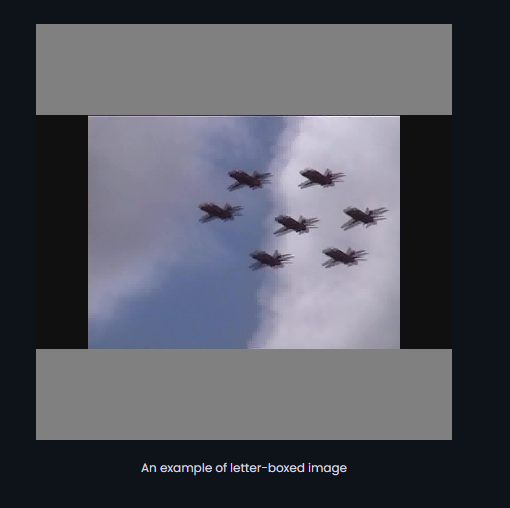


- batch: batch size , merupakan jumlah sampel yang akan di training 

misal memiliki  100  data citra, setting batch size = 5, maka ada 5 citra yang akan dimasukkan

- epochs: Jumlah zaman untuk dilatih
- data: File YAML data yang berisi informasi tentang dataset (path of images, labels)
- workers: Number of CPU workers
- cfg: Arsitektur model. Tersedia 4 pilihan : yolo5s.yaml, yolov5m.yaml, yolov5l.yaml, yolov5x.yaml. Ukuran dan kompleksitas model ini meningkat dalam urutan menaik dan Anda dapat memilih model yang sesuai dengan kompleksitas tugas deteksi objek Anda. Jika Anda ingin bekerja dengan arsitektur khusus, Anda harus menentukan YAML file di models folder menentukan network arsitektur.
- weights: Bobot pra-latihan tempat Anda ingin memulai latihan. Jika Anda ingin berlatih dari awal, gunakan --weights ' '
- name : Berbagai hal tentang training seperti train logs. training weights akan disimpan dalam folder bernama runs/train/name
- hyp: File YAML yang menjelaskan pilihan hyperparameter. Untuk contoh bagaimana mendefinisikan hyperparameters, lihat data/hyp.scratch.yaml. data/hyp.scratch.yaml. Jika tidak ditentukan gunakan file data/hyp.scratch.yaml 

**Data Config File**

Detail untuk kumpulan data tempat Anda ingin melatih model Anda ditentukan oleh data config YAML file. Parameter berikut harus ditentukan dalam data config filei :

- train, test, dan val: lokasi train, test, dan validation images.

- nc: Nomor clas di dataset (terdapat berapa banyak class)
- names: Nama kelas dalam kumpulan data. Indeks kelas dalam daftar ini akan digunakan sebagai pengenal untuk nama kelas dalam kode.

In [ ]:
train: ../ship_dataset/images/train/ 
val:  ../ship_dataset/images/val/
test: ../ship_dataset/images/test/

# number of classes
nc: 1

# class names
names: ["perahunelayan"]

YOLO v5 mengharapkan untuk menemukan training labels untuk images dalam folder yang namanya dapat diturunkan dengan mengganti images dengan labels di path ke images kumpulan data. Misalnya, pada contoh di atas, YOLO v5 akan mencari train labels di ../Road_Sign_Dataset/labels/train/.

Atau Anda bisa langsung mendownload filenya.

**Hyperparameter Config File**

 hyperparameter config file membantu kami menentukan hyperparameter untuk neural network/jaringan saraf kami. Kita akan menggunakan yang default, data/hyp.scratch.yaml. Ini adalah apa yang tampak seperti.

In [ ]:
# Hyperparameters for COCO training from scratch
# python train.py --batch 40 --cfg yolov5m.yaml --weights '' --data coco.yaml --img 640 --epochs 300
# See tutorials for hyperparameter evolution https://github.com/ultralytics/yolov5#tutorials


lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.5  # image scale (+/- gain)
shear: 0.0  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.0  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 1.0  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)

Anda dapat mengedit file ini, menyimpan file baru, dan menetapkannya sebagai argumen untuk train script.

**Custom Network Architecture**

YOLO v5 juga memungkinkan Anda untuk menentukan arsitektur dan anchor kustom Anda sendiri jika salah satu jaringan yang telah ditentukan tidak sesuai dengan tagihan untuk Anda. Untuk ini, Anda harus menentukan file konfigurasi bobot khusus. Untuk contoh ini, kami menggunakan yolov5s.yaml. Ini adalah apa yang tampak seperti.



ingat ubah pada nc

In [ ]:
# parameters
# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 2  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

Untuk menggunakan custom network, buat file baru dan tentukan saat dijalankan menggunakan cfg flag .

**Train the Model**
Kami menentukan lokasi train, val dan test, the number of classes (nc) and the names of the classes. Karena kumpulan datanya kecil, dan kami tidak memiliki banyak objek per gambar, kami mulai dengan model pra-latihan terkecil yolo5s untuk menjaga hal-hal sederhana dan menghindari overfitting. We keep a batch size of 32, image size of 640, and train for 100 epochs. Jika Anda mengalami masalah saat memasang model ke dalam memori:

- Use a smaller batch size
- Use a smaller network
- Use a smaller image size

Tentu saja, semua hal di atas dapat memengaruhi kinerja. Kompromi adalah keputusan desain yang harus Anda buat. Anda mungkin ingin menggunakan instance GPU yang lebih besar juga, tergantung pada situasinya.

Kami menggunakan nama yolo_road_det untuk train kami. Log tensorboard train dapat ditemukan di runs/train/yolo_road_det. Jika Anda tidak dapat mengakses tensorboard logs, Anda dapat menyiapkan akun wandb sehingga log tersebut diplot di akun wandb Anda.

Terakhir, jalankan pelatihan:

In [ ]:
#batch size 10
#cfg ubah
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 1000 --data shipdata.yaml --weights '' --name yolo_det_ship --save-period 1 --bbox_interval 1 

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=1000, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=1, artifact_alias=latest
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
Unpacking objects: 100% (9/9), done.
remote: Total 9 (delta 4), reused 3 (delta 2), pack-reused 0
From https://github.com/ultralytics/yolov5
 * [new branch]      update/README -> origin/updat

In [ ]:
#dibatalkan karena overfit
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 1000 --data shipdata.yaml --weights '' --name yolo_det_ship1 --save-period 1 --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=1000, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 100 --data shipdata.yaml --weights '' --name yolo_det_ship2 --save-period 1 --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=100, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship2, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=1, artifact_alias=latest
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 43 (delta 30), reused 35 (delta 22), pack-reused 0
Unpacking objects: 100% (43/43), done.
From https://github.com/ultralytics/yolov5
 * [new branch]      exp10      -> origi

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 80 --data shipdata.yaml --weights '' --name yolo_det_ship3 --save-period 1 --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=80, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship3, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 70 --data shipdata.yaml --weights '' --name yolo_det_ship4 --save-period 1 --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=70, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship4, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=True, bbox_interval=1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-219-ga83d2a5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 1000 --data shipdata.yaml --weights '' --name yolo_det_ship5_test2aja --save-period 1 #--bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=1000, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship5_test2aja, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-224-g82a5585 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 1000 --data shipdata.yaml --weights '' --name yolo_det_ship6 --save-period 1 

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=1000, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship6, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-224-g82a5585 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, o

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 800 --data shipdata.yaml --weights '' --name yolo_det_ship7 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=800, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship7, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 9 (delta 4), reused 9 (delta 4), pack-reused 0
Unpacking objects: 100% (9/9), done.
From https://github.com/ultralytics/yolov5
   24f6cf6..4c70cb5  exp10      -> origin/exp10
g

In [ ]:
#gagaaaaaaaaaaalllll
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 700 --data shipdata.yaml --weights '' --name yolo_det_ship8 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=700, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship8, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, ob

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 700 --data shipdata.yaml --weights '' --name yolo_det_ship9 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=700, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship9, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-226-gfde7758 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, ob

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 600 --data shipdata.yaml --weights '' --name yolo_det_ship10 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=600, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship10, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-228-g6ae3dff Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, o

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 500 --data shipdata.yaml --weights '' --name yolo_det_ship11 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=500, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship11, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-235-g75728bb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, o

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 500 --data shipdata.yaml --weights '' --name yolo_det_ship12 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=500, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship12, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-4-g7398d2d Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 700 --data shipdata.yaml --weights '' --name yolo_det_ship13 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=600, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship13, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (7/7), done.
From https://github.com/ultralytics/yolov5
   7398d2d..bfa1f23  master     -> origin/master

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 900 --data shipdata.yaml --weights '' --name yolo_det_ship13 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=900, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship13, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-5-gbfa1f23 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 1100 --data shipdata.yaml --weights '' --name yolo_det_ship14 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=1100, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship14, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-6-g31c1f11 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, ob

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 800 --data shipdata.yaml --weights '' --name yolo_det_ship15 --save-period 1 # --bbox_interval 1 --upload_dataset

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 750 --data shipdata.yaml --weights '' --name yolo_det_ship16 --save-period 1 

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=750, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship16, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-8-g350e8eb Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 760 --data shipdata.yaml --weights '' --name yolo_det_ship18 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=760, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship18, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-18-gd7955fe Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, ob

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 600 --data shipdata.yaml --weights '' --name yolo_det_ship19 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=600, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship19, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-21-ga1b6e79 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, ob

In [ ]:
!python train.py --img 800 --cfg shipyolov5s.yaml --hyp hyp.scratch-med.yaml --batch 10 --epochs 600 --data shipdata.yaml --weights '' --name yolo_det_ship20 --save-period 1 # --bbox_interval 1 --upload_dataset

wandb: Currently logged in as: andhika. Use `wandb login --relogin` to force relogin
train: weights=, cfg=shipyolov5s.yaml, data=shipdata.yaml, hyp=hyp.scratch-med.yaml, epochs=600, batch_size=10, imgsz=800, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolo_det_ship20, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-23-g5dc1ce4 Python-3.8.15 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.3, cls_pw=1.0, obj=0.7, obj_pw=1.0, iou_t

Ini mungkin memerlukan waktu hingga 30 menit untuk train, tergantung pada hardware Anda

**Inference**

Ada banyak cara untuk menjalankan inferensi menggunakan detect.py file

source flag mendefinisikan sumber detektor kami, yang dapat berupa

- A single image
- A folder of images
- Video
- Webcam

dan berbagai format lainnya. Kami ingin menjalankannya di atas test images kami sehingga kami mengatur source flag to ../Road_Sign_Dataset/images/test/.

- The weights flag mendefinisikan jalur/path model yang ingin kita jalankan dengan detektor kita.
- conf flag is the thresholding objectness confidence.
- name flag adalah objek ambang batas yang menentukan di mana deteksi disimpan. Kami menetapkan kepercayaan ini flag to yolo_road_det oleh karena itu, deteksi akan disimpan diruns/detect/yolo_road_det/.

Dengan semua opsi diputuskan, mari kita jalankan inferensi atas kumpulan data pengujian kami.

In [ ]:
!dir

CONTRIBUTING.md  hubconf.py   README.md		train.py	yolov5s.pt
data		 LICENSE      requirements.txt	tutorial.ipynb
detect.py	 models       runs		utils
export.py	 __pycache__  setup.cfg		val.py


In [ ]:
#yoloroaddet3 karena sudh berapa kali dilakukan train tetapi diulang2 terus dan memilih yoloroad3 karena paling terakhir
!python detect.py --source ../Road_Sign_Dataset/images/test/ --weights runs/train/yolo_road_det3/weights/best.pt --conf 0.25 --name yolo_road_det

python3: can't open file 'detect.py': [Errno 2] No such file or directory


In [ ]:
!python detect.py --source ../ship_dataset/images/test/ --weights runs/train/yolo_ship_det14/weights/best.pt --conf 0.25 --name yolo_ship_det

detect: weights=['runs/train/yolo_ship_det14/weights/best.pt'], source=../ship_dataset/images/test/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_ship_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 204.0 GFLOPs
image 1/102 /content/ship_dataset/images/test/kapal1000.png: 480x640 1 perahunelayan, 3 kapalnelayans, Done. (0.038s)
image 2/102 /content/ship_dataset/images/test/kapal1002.png: 480x640 1 perahunelayan, 3 kapalnelayans, Done. (0.035s)
image 3/102 /content/ship_dataset/images/test/kapal1003.png: 480x640 1 perahu

best.pt  berisi bobot/weights berkinerja terbaik yang disimpan selama pelatihan.

Kita sekarang dapat secara acak memplot salah satu deteksi.

In [ ]:
#yoloroaddet2 yang diambil
detections_dir = "runs/detect/yolo_road_det2/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

In [ ]:
detections_dir = "runs/detect/yolo_ship_det/"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))

Selain folder images, ada sumber lain yang dapat kita gunakan untuk detektor kita juga. Sintaks perintah untuk melakukannya dijelaskan sebagai berikut.



In [ ]:
#pada saat detect ingat ganti tentukan bobot/weights
!python detect.py --source kapal.jpg --weights runs/train/yolo_road_det3/weights/best.pt 
                            # webcam
                            #file.jpg  # image 
                            #file.mp4  # video
                            #path/  # directory
                            #path/*.jpg  # glob
                            #rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa  # rtsp stream
                            #rtmp://192.168.1.105/live/test  # rtmp stream
                            #http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8

detect: weights=['runs/train/yolo_road_det3/weights/best.pt'], source=kapal.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-241-g7d87b9e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolov5/kapal.jpg: 480x640 Done. (0.013s)
Speed: 0.8ms pre-process, 12.6ms inference, 0.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp18


In [ ]:
#ternyata bukan biru bounding boxnya
!python detect.py --source belumtau.jpg --weights runs/train/yolo_ship_det4/weights/best.pt #belum dites
                            # webcam
                            #file.jpg  # image 
                            #file.mp4  # video
                            #path/  # directory
                            #path/*.jpg  # glob
                            #rtsp://170.93.143.139/rtplive/470011e600ef003a004ee33696235daa  # rtsp stream
                            #rtmp://192.168.1.105/live/test  # rtmp stream
                            #http://112.50.243.8/PLTV/88888888/224/3221225900/1.m3u8

**Menghitung mAP pada test dataset**

Kita bisa menggunakan test file untuk menghitung mAP pada set test/pengujian kami. Untuk melakukan evaluasi pada set test kami, kami menetapkan task flag to test. Kami menetapkan nama menjadi yolo_det. Hal-hal seperti plot berbagai kurva (F1, AP, Precision curves etc) dapat ditemukan di folder runs/test/yolo_road_det. Script menghitung average precision untuk setiap kelas, serta serta rata-rata Presisi Rata-rata(average precision).

In [ ]:
#ubah menjadi val dan yoloroadet3
!python val.py --weights runs/train/yolo_road_det3/weights/best.pt --data road_sign_data.yaml --task test --name yolo_det

val: data=/content/yolov5/data/road_sign_data.yaml, weights=['runs/train/yolo_road_det3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-241-g7d87b9e Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/yolov5/../Road_Sign_Dataset/labels/test' images and labels...88 found, 0 missing, 0 empty, 0 corrupt: 100% 88/88 [00:00<00:00, 1820.50it/s]
test: New cache created: /content/yolov5/../Road_Sign_Dataset/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 3/3 [00:02<00:00,  1.18it/s]
                 all         88        126      0.982  

In [ ]:
!python val.py --weights runs/train/yolo_ship_det14/weights/best.pt --data ship.yaml --task test --name yolo_det

val: data=/content/yolov5/data/ship.yaml, weights=['runs/train/yolo_ship_det14/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 204.0 GFLOPs
test: Scanning '/content/yolov5/../ship_dataset/labels/test' images and labels...102 found, 0 missing, 0 empty, 0 corrupt: 100% 102/102 [00:00<00:00, 686.86it/s]
test: New cache created: /content/yolov5/../ship_dataset/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:06<00:00,  1.53s/it]
                 all        102        176      0.829      0.914      

In [ ]:
!python val.py --weights runs/train/yolo_ship_det/weights/best.pt --data ship.yaml --task test --name yolo_det

Dan itu cukup banyak untuk tutorial ini. Dalam tutorial ini, kami melatih YOLO v5 pada kumpulan data khusus rambu lalu lintas. Jika Anda ingin bermain-main dengan hyperparameter, atau jika Anda ingin berlatih pada dataset yang berbeda, Anda dapat mengambil Gradient Notebook untuk tutorial ini sebagai titik awal

In [ ]:
%cd images

/content/Road_Sign_Dataset/images


In [ ]:
!dir

test  train  val


In [ ]:
print(len(train_images))

701


In [ ]:
print(len(test_images))

88


In [ ]:
print(len(val_images))

88


In [ ]:
%cd labels

/content/Road_Sign_Dataset/labels


In [ ]:
print(len(train_annotations))

701


In [ ]:
print(len(test_annotations))

88


In [ ]:
print(len(val_annotations))

88


In [ ]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
